<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/AI_W6_10_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a09c28f8ca509e9620bcc808dd8526794ef19ce824afeb8d9080214c55e2c8d9
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
#Điều khiển động cơ servo

156.4859152762212


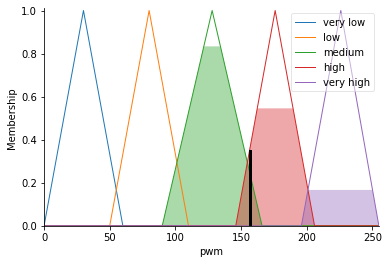

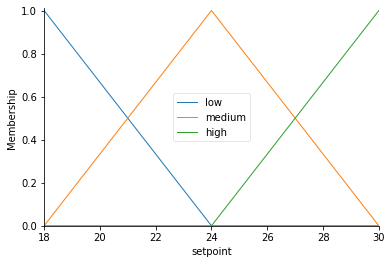

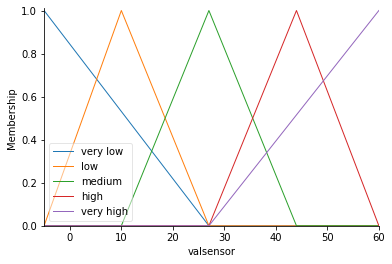

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

setpoint = ctrl.Antecedent(np.arange(18,31,1),'setpoint')
valsensor = ctrl.Antecedent(np.arange(-5,61,1),'valsensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

setpoint['low'] = fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium'] = fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['high'] = fuzz.trimf(setpoint.universe,[24,30,30])

valsensor['very low'] = fuzz.trimf(valsensor.universe,[-5,-5,27])
valsensor['low'] = fuzz.trimf(valsensor.universe,[-5,10,27])
valsensor['medium'] = fuzz.trimf(valsensor.universe,[10,27,44])
valsensor['high'] = fuzz.trimf(valsensor.universe,[27,44,60])
valsensor['very high'] = fuzz.trimf(valsensor.universe,[27,60,60])

pwm['very low'] = fuzz.trimf(pwm.universe,[0,30,60])
pwm['low'] = fuzz.trimf(pwm.universe,[50,80,110])
pwm['medium'] = fuzz.trimf(pwm.universe,[90,128,166])
pwm['high'] = fuzz.trimf(pwm.universe,[146,176,206])
pwm['very high'] = fuzz.trimf(pwm.universe,[196,226,255])

rule1 = ctrl.Rule(setpoint['low'] & valsensor['very low'], pwm['very low'])
rule2 = ctrl.Rule(setpoint['low'] & valsensor['low'], pwm['very low'])
rule3 = ctrl.Rule(setpoint['low'] & valsensor['medium'], pwm['low'])
rule4 = ctrl.Rule(setpoint['low'] & valsensor['high'], pwm['medium'])
rule5 = ctrl.Rule(setpoint['low'] & valsensor['very high'], pwm['medium'])

rule6 = ctrl.Rule(setpoint['medium'] & valsensor['very low'], pwm['very low'])
rule7 = ctrl.Rule(setpoint['medium'] & valsensor['low'], pwm['low'])
rule8 = ctrl.Rule(setpoint['medium'] & valsensor['medium'], pwm['medium'])
rule9 = ctrl.Rule(setpoint['medium'] & valsensor['high'], pwm['medium'])
rule10 = ctrl.Rule(setpoint['medium'] & valsensor['very high'], pwm['high'])

rule11 = ctrl.Rule(setpoint['high'] & valsensor['very low'], pwm['low'])
rule12 = ctrl.Rule(setpoint['high'] & valsensor['low'], pwm['medium'])
rule13 = ctrl.Rule(setpoint['high'] & valsensor['medium'], pwm['high'])
rule14 = ctrl.Rule(setpoint['high'] & valsensor['high'], pwm['very high'])
rule15 = ctrl.Rule(setpoint['high'] & valsensor['very high'], pwm['very high'])

pwmcontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwmcontrol = ctrl.ControlSystemSimulation(pwmcontrol_ctrl)
pwmcontrol.input['setpoint'] = 25
pwmcontrol.input['valsensor'] = 45
pwmcontrol.compute()
print(pwmcontrol.output['pwm'])
pwm.view(sim=pwmcontrol)

setpoint.view()
valsensor.view()

In [ ]:
#Điều khiển mobile robot

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

ls = ctrl.Antecedent(np.arange(0,16,0.1),'leftsensor')
cs = ctrl.Antecedent(np.arange(0,16,1),'centersensor')
rs = ctrl.Antecedent(np.arange(0,16,1),'rightsensor')
lc = ctrl.Consequent(np.arange(-90,1,1),'LC')
rc = ctrl.Consequent(np.arange(0,91,1),'RC')
pwm_l = ctrl.Consequent(np.arange(0,256,1),'PWMleft')
pwm_r = ctrl.Consequent(np.arange(0,256,1),'PWMright')

ls['low'] = fuzz.trimf(ls.universe,[0,3,6])
ls['medium'] = fuzz.trimf(ls.universe,[4,7.5,11])
ls['high'] = fuzz.trimf(ls.universe,[9,12,15])

cs['low'] = fuzz.trimf(cs.universe,[0,3,6])
cs['medium'] = fuzz.trimf(cs.universe,[4,7.5,11])
cs['high'] = fuzz.trimf(cs.universe,[9,12,15])

rs['low'] = fuzz.trimf(rs.universe,[0,3,6])
rs['medium'] = fuzz.trimf(rs.universe,[4,7.5,11])
rs['high'] = fuzz.trimf(rs.universe,[9,12,15])

lc['high'] = fuzz.trimf(lc.universe,[-90,-70,-45])
lc['medium'] = fuzz.trimf(lc.universe,[-60,-45,-30])
lc['low'] = fuzz.trimf(lc.universe,[-45,-20,0])

rc['high'] = fuzz.trimf(rc.universe,[45,70,90])
rc['medium'] = fuzz.trimf(rc.universe,[30,45,60])
rc['low'] = fuzz.trimf(rc.universe,[0,20,45])

pwm_l['zero'] = fuzz.trimf(pwm_l.universe,[0,0,0])
pwm_l['very low'] = fuzz.trimf(pwm_l.universe,[0,30,60])
pwm_l['low'] = fuzz.trimf(pwm_l.universe,[50,80,110])
pwm_l['medium'] = fuzz.trimf(pwm_l.universe,[90,128,166])
pwm_l['high'] = fuzz.trimf(pwm_l.universe,[146,176,206])
pwm_l['very high'] = fuzz.trimf(pwm_l.universe,[196,226,255])

pwm_r['zero'] = fuzz.trimf(pwm_r.universe,[0,0,0])
pwm_r['very low'] = fuzz.trimf(pwm_r.universe,[0,30,60])
pwm_r['low'] = fuzz.trimf(pwm_r.universe,[50,80,110])
pwm_r['medium'] = fuzz.trimf(pwm_r.universe,[90,128,166])
pwm_r['high'] = fuzz.trimf(pwm_r.universe,[146,176,206])
pwm_r['very high'] = fuzz.trimf(pwm_r.universe,[196,226,255])

rule1 = ctrl.Rule(ls['low'] & cs['low'], rc['low'])
rule2 = ctrl.Rule(ls['low'] & cs['medium'], rc['low'])
rule3 = ctrl.Rule(ls['low'] & cs['high'], rc['medium'])
rule4 = ctrl.Rule(ls['medium'] & cs['low'], rc['low'])
rule5 = ctrl.Rule(ls['medium'] & cs['medium'], rc['medium'])
rule6 = ctrl.Rule(ls['medium'] & cs['high'], rc['high'])
rule7 = ctrl.Rule(ls['high'] & cs['low'], rc['medium'])
rule8 = ctrl.Rule(ls['high'] & cs['medium'], rc['high'])
rule9 = ctrl.Rule(ls['high'] & cs['high'], rc['high'])

rule11 = ctrl.Rule(rs['low'] & cs['low'], lc['low'])
rule12 = ctrl.Rule(rs['low'] & cs['medium'], lc['low'])
rule13 = ctrl.Rule(rs['low'] & cs['high'], lc['medium'])
rule14 = ctrl.Rule(rs['medium'] & cs['low'], lc['low'])
rule15 = ctrl.Rule(rs['medium'] & cs['medium'], lc['medium'])
rule16 = ctrl.Rule(rs['medium'] & cs['high'], lc['high'])
rule17 = ctrl.Rule(rs['high'] & cs['low'], lc['medium'])
rule18 = ctrl.Rule(rs['high'] & cs['medium'], lc['high'])
rule19 = ctrl.Rule(rs['high'] & cs['high'], lc['high'])

rule21 = ctrl.Rule(lc['low'] & rc['low'], pwm_l['very high'])
rule22 = ctrl.Rule(lc['low'] & rc['medium'], pwm_l['very high'])
rule23 = ctrl.Rule(lc['low'] & rc['high'], pwm_l['high'])
rule24 = ctrl.Rule(lc['medium'] & rc['low'], pwm_l['medium'])
rule25 = ctrl.Rule(lc['medium'] & rc['medium'], pwm_l['medium'])
rule26 = ctrl.Rule(lc['medium'] & rc['high'], pwm_l['medium'])
rule27 = ctrl.Rule(lc['high'] & rc['low'], pwm_l['low'])
rule28 = ctrl.Rule(lc['high'] & rc['medium'], pwm_l['very low'])
rule29 = ctrl.Rule(lc['high'] & rc['high'], pwm_l['zero'])

rule31 = ctrl.Rule(lc['low'] & rc['low'], pwm_r['very high'])
rule32 = ctrl.Rule(lc['low'] & rc['medium'], pwm_r['medium'])
rule33 = ctrl.Rule(lc['low'] & rc['high'], pwm_r['low'])
rule34 = ctrl.Rule(lc['medium'] & rc['low'], pwm_r['very high'])
rule35 = ctrl.Rule(lc['medium'] & rc['medium'], pwm_r['medium'])
rule36 = ctrl.Rule(lc['medium'] & rc['high'], pwm_r['very low'])
rule37 = ctrl.Rule(lc['high'] & rc['low'], pwm_r['high'])
rule38 = ctrl.Rule(lc['high'] & rc['medium'], pwm_r['medium'])
rule39 = ctrl.Rule(lc['high'] & rc['high'], pwm_r['zero'])

pwmleft_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,
                                      rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,
                                      rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29])
pwmleft = ctrl.ControlSystemSimulation(pwmleft_ctrl)
pwmleft.input['leftsensor'] = 2.1
pwmleft.input['centersensor'] = 1
pwmleft.input['rightsensor'] = 5
pwmleft.compute()
print('PWM Left:',pwmleft.output['PWMleft'])

pwmright_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,
                                      rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,
                                      rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39])
pwmright = ctrl.ControlSystemSimulation(pwmright_ctrl)
pwmright.input['leftsensor'] = 2.1
pwmright.input['centersensor'] = 1
pwmright.input['rightsensor'] = 5
pwmright.compute()
print('PWM Right:',pwmright.output['PWMright'])


PWM Left: 225.57777777777767
PWM Right: 225.57777777777767
